In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from math import nan

from smyleutils import averaging_utils as avg
from smyleutils import qboplot_utils as qbo
from smyleutils import colorbar_utils as cbars
from smyleutils import bootstrap_utils as boot
from smyleutils import zmplot_utils as zmplot

import sys

In [2]:
plotpath="/glade/campaign/cgd/cas/islas/python_plots/NCAR_CW3E_SMYLE/FIGURES/"

### Read in the data

In [3]:
basepath="/glade/campaign/cgd/cas/islas/python_savs/NCAR_CW3E_SMYLE/DATA_SORT/Uzm/"

high_nov=xr.open_dataset(basepath+'Uzm_BSMYLE-CW3E-L83_day_init11.nc')
low_nov=xr.open_dataset(basepath+'Uzm_BSMYLE-CW3E_day_init11.nc') ; low_nov['lat'] = high_nov.lat
era5_nov=xr.open_dataset(basepath+'Uzm_ERA5_day_init11.nc') ; era5_nov['lat'] = high_nov.lat
jra3q_nov = xr.open_dataset(basepath+'Uzm_JRA3Q_day_init11.nc') ; jra3q_nov['lat'] = high_nov.lat

high_feb=xr.open_dataset(basepath+'Uzm_BSMYLE-CW3E-L83_day_init02.nc') ; high_feb['lat'] = high_nov.lat
low_feb=xr.open_dataset(basepath+'Uzm_BSMYLE-CW3E_day_init02.nc') ; low_feb['lat'] = high_nov.lat
era5_feb=xr.open_dataset(basepath+'Uzm_ERA5_day_init02.nc') ; era5_feb['lat'] = high_nov.lat
jra3q_feb = xr.open_dataset(basepath+'Uzm_JRA3Q_day_init02.nc') ; jra3q_feb['lat'] = high_nov.lat

high_sep=xr.open_dataset(basepath+'Uzm_BSMYLE-CW3E-L83_day_init09.nc') ; high_sep['lat'] = high_nov.lat
low_sep=xr.open_dataset(basepath+'Uzm_BSMYLE-CW3E_day_init09.nc') ; low_sep['lat'] = high_nov.lat
era5_sep=xr.open_dataset(basepath+'Uzm_ERA5_day_init09.nc') ; era5_sep['lat'] = high_nov.lat
jra3q_sep=xr.open_dataset(basepath+'Uzm_JRA3Q_day_init09.nc') ; jra3q_sep['lat'] = high_nov.lat

### Read in ERA5 surface pressure to mask below topography

In [4]:
ps = xr.open_dataset("/glade/campaign/collections/rda/data/d633000/e5.oper.an.sfc/197901/"+
                     "e5.oper.an.sfc.128_134_sp.ll025sc.1979010100_1979013123.nc").mean('time')
ps = ps.SP
ps = ps.min('longitude')
ps = ps.interp(latitude=era5_nov.lat)
ps = ps/100.

### Select the first 6 months since that's what we have for the high top

In [5]:
startdate=high_nov.time.isel(time=0).values ; enddate=high_nov.time.isel(time=high_nov.time.size-1).values
high_nov = high_nov.sel(time=slice(startdate,enddate)).Uzm
low_nov = low_nov.sel(time=slice(startdate,enddate)).Uzm
era5_nov = era5_nov.sel(time=slice(startdate,enddate)).Uzm
jra3q_nov = jra3q_nov.sel(time=slice(startdate,enddate)).Uzm

startdate=high_sep.time.isel(time=0).values ; enddate=high_sep.time.isel(time=high_sep.time.size-1).values
high_sep = high_sep.sel(time=slice(startdate,enddate)).Uzm
low_sep = low_sep.sel(time=slice(startdate,enddate)).Uzm
era5_sep = era5_sep.sel(time=slice(startdate,enddate)).Uzm
jra3q_sep = jra3q_sep.sel(time=slice(startdate,enddate)).Uzm

startdate=high_feb.time.isel(time=0).values ; enddate=high_feb.time.isel(time=high_feb.time.size-1).values
high_feb = high_feb.sel(time=slice(startdate,enddate)).Uzm
low_feb = low_feb.sel(time=slice(startdate,enddate)).Uzm
era5_feb = era5_feb.sel(time=slice(startdate,enddate)).Uzm
jra3q_feb = jra3q_feb.sel(time=slice(startdate,enddate)).Uzm

### Calculate lead month 2-4 averages

In [6]:
high_nov_djf = high_nov.sel(time=slice("1970-12-01","1971-02-28")).mean('time')
low_nov_djf = low_nov.sel(time=slice("1970-12-01","1971-02-28")).mean('time')
era5_nov_djf = era5_nov.sel(time=slice("1970-12-01","1971-02-28")).mean('time')
jra3q_nov_djf = jra3q_nov.sel(time=slice("1970-12-01","1971-02-28")).mean('time')

high_sep_ond = high_sep.sel(time=slice("1970-10-01","1970-12-31")).mean('time')
low_sep_ond = low_sep.sel(time=slice("1970-10-01","1970-12-31")).mean('time')
era5_sep_ond = era5_sep.sel(time=slice("1970-10-01","1970-12-31")).mean('time')
jra3q_sep_ond = jra3q_sep.sel(time=slice("1970-10-01","1970-12-31")).mean('time')

high_feb_mam = high_feb.sel(time=slice("1970-03-01","1970-05-31")).mean('time')
low_feb_mam = low_feb.sel(time=slice("1970-03-01","1970-05-31")).mean('time')
era5_feb_mam = era5_feb.sel(time=slice("1970-03-01","1970-05-31")).mean('time')
jra3q_feb_mam = jra3q_feb.sel(time=slice("1970-03-01","1970-05-31")).mean('time')

### Interpolate the seasonal averages from the pressure levels of the CAM TEM diagnostics onto the ERA5 pressure levels

In [7]:
high_nov_djf = high_nov_djf.interp(ilev=era5_nov_djf.level) ; low_nov_djf = low_nov_djf.interp(ilev=era5_nov_djf.level)
high_sep_ond = high_sep_ond.interp(ilev=era5_sep_ond.level) ; low_sep_ond = low_sep_ond.interp(ilev=era5_sep_ond.level)
high_feb_mam = high_feb_mam.interp(ilev=era5_feb_mam.level) ; low_feb_mam = low_feb_mam.interp(ilev=era5_feb_mam.level)

jra3q_nov_djf = jra3q_nov_djf.interp(pre=era5_nov.level)
jra3q_sep_ond = jra3q_sep_ond.interp(pre=era5_nov.level)
jra3q_feb_mam = jra3q_feb_mam.interp(pre=era5_nov.level)

### Calculate the ensemble mean

In [8]:
high_nov_djf_em = high_nov_djf.mean('M') ; low_nov_djf_em = low_nov_djf.mean('M') 
high_sep_ond_em = high_sep_ond.mean('M') ; low_sep_ond_em = low_sep_ond.mean('M') 
high_feb_mam_em = high_feb_mam.mean('M') ; low_feb_mam_em = low_feb_mam.mean('M')

### Calculate the lead dependent climatology

In [9]:
era5_nov_djf_clim = era5_nov_djf.mean('init_year') ; high_nov_djf_clim = high_nov_djf_em.mean('init_year') ; low_nov_djf_clim = low_nov_djf_em.mean('init_year')
era5_sep_ond_clim = era5_sep_ond.mean('init_year') ; high_sep_ond_clim = high_sep_ond_em.mean('init_year') ; low_sep_ond_clim = low_sep_ond_em.mean('init_year')
era5_feb_mam_clim = era5_feb_mam.mean('init_year') ; high_feb_mam_clim = high_feb_mam_em.mean('init_year') ; low_feb_mam_clim = low_feb_mam_em.mean('init_year')
jra3q_nov_djf_clim = jra3q_nov_djf.mean('init_year')
jra3q_sep_ond_clim = jra3q_sep_ond.mean('init_year')
jra3q_feb_mam_clim = jra3q_feb_mam.mean('init_year')

### Subtract the lead dependent climatology from ERA5 and the SMYLE ensemble mean and the SMYLE individual member

In [10]:
high_nov_djf = high_nov_djf - high_nov_djf_clim ; high_nov_djf_em = high_nov_djf_em - high_nov_djf_clim
high_sep_ond = high_sep_ond - high_sep_ond_clim ; high_sep_ond_em = high_sep_ond_em - high_sep_ond_clim
high_feb_mam = high_feb_mam - high_feb_mam_clim ; high_feb_mam_em = high_feb_mam_em - high_feb_mam_clim

low_nov_djf = low_nov_djf - low_nov_djf_clim ; low_nov_djf_em = low_nov_djf_em - low_nov_djf_clim
low_sep_ond = low_sep_ond - low_sep_ond_clim ; low_sep_ond_em = low_sep_ond_em - low_sep_ond_clim
low_feb_mam = low_feb_mam - low_feb_mam_clim ; low_feb_mam_em = low_feb_mam_em - low_feb_mam_clim

era5_nov_djf = era5_nov_djf - era5_nov_djf_clim
era5_sep_ond = era5_sep_ond - era5_sep_ond_clim
era5_feb_mam = era5_feb_mam - era5_feb_mam_clim

jra3q_nov_djf = jra3q_nov_djf - jra3q_nov_djf_clim
jra3q_sep_ond = jra3q_sep_ond - jra3q_sep_ond_clim
jra3q_feb_mam = jra3q_feb_mam - jra3q_feb_mam_clim

### Anomaly correlation coefficient

In [11]:
acc_high_nov = xr.corr(era5_nov_djf, high_nov_djf_em, dim='init_year')
acc_low_nov = xr.corr(era5_nov_djf, low_nov_djf_em, dim='init_year')
acc_high_nov_jra = xr.corr(jra3q_nov_djf, high_nov_djf_em, dim='init_year')
acc_low_nov_jra = xr.corr(jra3q_nov_djf, low_nov_djf_em, dim='init_year')

acc_high_sep = xr.corr(era5_sep_ond, high_sep_ond_em, dim='init_year')
acc_low_sep = xr.corr(era5_sep_ond, low_sep_ond_em, dim='init_year')
acc_high_sep_jra = xr.corr(jra3q_sep_ond, high_sep_ond_em, dim='init_year')
acc_low_sep_jra = xr.corr(jra3q_sep_ond, low_sep_ond_em, dim='init_year')

acc_high_feb = xr.corr(era5_feb_mam, high_feb_mam_em, dim='init_year')
acc_low_feb = xr.corr(era5_feb_mam, low_feb_mam_em, dim='init_year')
cc_high_feb_jra = xr.corr(jra3q_feb_mam, high_feb_mam_em, dim='init_year')
acc_low_feb_jra = xr.corr(jra3q_feb_mam, low_feb_mam_em, dim='init_year')

### Mean squared skill score 

In [12]:
def calcmsss(mod,obs,dim='init_year'):
    mse_mod = (1./mod[dim].size)*((mod - obs)**2).sum('init_year')
    mse_obs = (1./mod[dim].size)*(obs**2).sum('init_year')
    msss = 1 - (mse_mod / mse_obs)
    
    # dealing with the levels where low top doesn't have any data
    msss = msss.where( msss != 1, nan)
    return msss

In [13]:
msss_high_nov = calcmsss(high_nov_djf_em, era5_nov_djf)
msss_low_nov = calcmsss(low_nov_djf_em, era5_nov_djf)
msss_high_nov_jra = calcmsss(high_nov_djf_em, jra3q_nov_djf)
msss_low_nov_jra = calcmsss(low_nov_djf_em, jra3q_nov_djf)

msss_high_sep = calcmsss(high_sep_ond_em, era5_sep_ond)
msss_low_sep = calcmsss(low_sep_ond_em, era5_sep_ond)
msss_high_sep_jra = calcmsss(high_sep_ond_em, jra3q_sep_ond)
msss_low_sep_jra = calcmsss(low_sep_ond_em, jra3q_sep_ond)

msss_high_feb = calcmsss(high_feb_mam_em, era5_feb_mam)
msss_low_feb = calcmsss(low_feb_mam_em, era5_feb_mam)
msss_high_feb_jra = calcmsss(high_feb_mam_em, jra3q_feb_mam)
msss_low_feb_jra = calcmsss(low_feb_mam_em, jra3q_feb_mam)

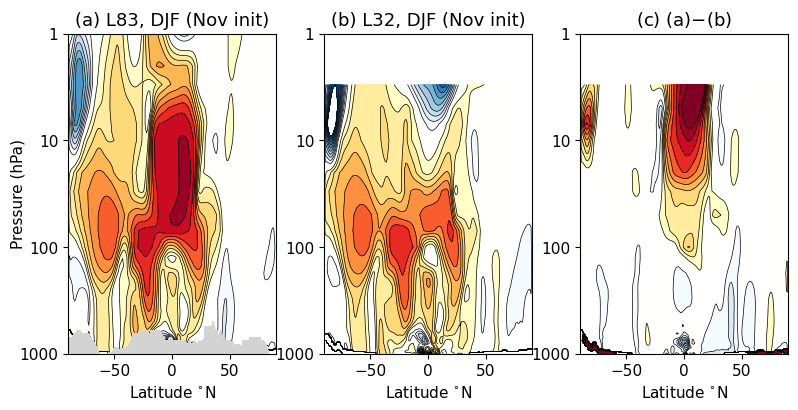

In [21]:
fig = plt.figure(figsize=(16,16))

mask = msss_high_nov*0 + nan 
mask = mask.where( msss_high_nov.level < ps, 1)
ax = zmplot.plotlatlogpre_to1(fig, msss_high_nov, msss_high_nov.lat, msss_high_nov.level,0.1,-1,1,'(a) L83, DJF (Nov init)',
                              0.03,0.16,0.8,1)
ax.contourf(mask.lat, -1.*np.log10(mask.level), mask, levels=[0,0.5,1], colors='lightgray', zorder=50)

ax = zmplot.plotlatlogpre_to1(fig, msss_low_nov, msss_low_nov.lat, msss_low_nov.level,0.1,-1,1,'(b) L32, DJF (Nov init)',
                              0.19,0.32,0.8,1, ylabel=False)

ax = zmplot.plotlatlogpre_to1(fig, msss_high_nov - msss_low_nov, msss_low_nov.lat, msss_low_nov.level,0.1,-1,1,'(c) (a)$-$(b)',
                              0.35,0.48,0.8,1,ylabel=False)

### Analysis of individual months

In [14]:
### Interpolate to 10 hPa
high_nov_10 = high_nov.interp(ilev=10.) ; high_feb_10 = high_feb.interp(ilev=10.) ; high_sep_10 = high_sep.interp(ilev=10.)
low_nov_10 = low_nov.interp(ilev=10.) ; low_feb_10 = low_feb.interp(ilev=10.) ; low_sep_10 = low_sep.interp(ilev=10.)
era5_nov_10 = era5_nov.interp(level=10.) ; era5_feb_10 = era5_feb.interp(level=10.) ; era5_sep_10 = era5_sep.interp(level=10.)
jra3q_nov_10 = jra3q_nov.interp(pre=10.) ; jra3q_feb_10 = jra3q_feb.interp(pre=10.) ; jra3q_sep_10 = jra3q_sep.interp(pre=10.)

### Lead dependent climatology

In [15]:
high_nov_10_clim = high_nov_10.mean('init_year') ; low_nov_10_clim = low_nov_10.mean('init_year') ; era5_nov_10_clim = era5_nov_10.mean('init_year')
high_feb_10_clim = high_feb_10.mean('init_year') ; low_feb_10_clim = low_feb_10.mean('init_year') ; era5_feb_10_clim = era5_feb_10.mean('init_year')
high_sep_10_clim = high_sep_10.mean('init_year') ; low_sep_10_clim = low_sep_10.mean('init_year') ; era5_sep_10_clim = era5_sep_10.mean('init_year')

jra3q_nov_10_clim = jra3q_nov_10.mean('init_year')
jra3q_feb_10_clim = jra3q_feb_10.mean('init_year')
jra3q_sep_10_clim = jra3q_sep_10.mean('init_year')

#### Anomalies from lead dependent climatology

In [16]:
high_nov_10_anoms = high_nov_10 - high_nov_10_clim ; low_nov_10_anoms = low_nov_10 - low_nov_10_clim ; era5_nov_10_anoms = era5_nov_10 - era5_nov_10_clim
high_feb_10_anoms = high_feb_10 - high_feb_10_clim ; low_feb_10_anoms = low_feb_10 - low_feb_10_clim ; era5_feb_10_anoms = era5_feb_10 - era5_feb_10_clim
high_sep_10_anoms = high_sep_10 - high_sep_10_clim ; low_sep_10_anoms = low_sep_10 - low_sep_10_clim ; era5_sep_10_anoms = era5_sep_10 - era5_sep_10_clim

jra3q_nov_10_anoms = jra3q_nov_10 - jra3q_nov_10_clim
jra3q_feb_10_anoms = jra3q_feb_10 - jra3q_feb_10_clim
jra3q_sep_10_anoms = jra3q_sep_10 - jra3q_sep_10_clim

In [17]:
months = [11, 12, 1, 2, 3, 4]
high_nov_10_anoms_mon = [ high_nov_10_anoms.where( high_nov_10_anoms.time.dt.month == imon, drop=True).mean('time') for imon in months ]
high_nov_10_anoms_mon = xr.concat(high_nov_10_anoms_mon, dim=months)
high_nov_10_anoms_mon = high_nov_10_anoms_mon.rename(concat_dim='month')
low_nov_10_anoms_mon = [ low_nov_10_anoms.where( low_nov_10_anoms.time.dt.month == imon, drop=True).mean('time') for imon in months ] 
low_nov_10_anoms_mon = xr.concat(low_nov_10_anoms_mon, dim=months)
low_nov_10_anoms_mon = low_nov_10_anoms_mon.rename(concat_dim='month')
era5_nov_10_anoms_mon = [ era5_nov_10_anoms.where( era5_nov_10_anoms.time.dt.month == imon, drop=True).mean('time') for imon in months ]
era5_nov_10_anoms_mon = xr.concat(era5_nov_10_anoms_mon, dim=months)
era5_nov_10_anoms_mon = era5_nov_10_anoms_mon.rename(concat_dim='month')
jra3q_nov_10_anoms_mon = [ jra3q_nov_10_anoms.where( jra3q_nov_10_anoms.time.dt.month == imon, drop=True).mean('time') for imon in months ]
jra3q_nov_10_anoms_mon = xr.concat(jra3q_nov_10_anoms_mon, dim=months)
jra3q_nov_10_anoms_mon = jra3q_nov_10_anoms_mon.rename(concat_dim='month')


months=[2,3,4,5,6,7]
high_feb_10_anoms_mon = [ high_feb_10_anoms.where( high_feb_10_anoms.time.dt.month == imon, drop=True).mean('time') for imon in months ]
high_feb_10_anoms_mon = xr.concat(high_feb_10_anoms_mon, dim=months)
high_feb_10_anoms_mon = high_feb_10_anoms_mon.rename(concat_dim='month')
low_feb_10_anoms_mon = [ low_feb_10_anoms.where( low_feb_10_anoms.time.dt.month == imon, drop=True).mean('time') for imon in months ] 
low_feb_10_anoms_mon = xr.concat(low_feb_10_anoms_mon, dim=months)
low_feb_10_anoms_mon = low_feb_10_anoms_mon.rename(concat_dim='month')
era5_feb_10_anoms_mon = [ era5_feb_10_anoms.where( era5_feb_10_anoms.time.dt.month == imon, drop=True).mean('time') for imon in months ]
era5_feb_10_anoms_mon = xr.concat(era5_feb_10_anoms_mon, dim=months)
era5_feb_10_anoms_mon = era5_feb_10_anoms_mon.rename(concat_dim='month')
jra3q_feb_10_anoms_mon = [ jra3q_feb_10_anoms.where( jra3q_feb_10_anoms.time.dt.month == imon, drop=True).mean('time') for imon in months ]
jra3q_feb_10_anoms_mon = xr.concat(jra3q_feb_10_anoms_mon, dim=months)
jra3q_feb_10_anoms_mon = jra3q_feb_10_anoms_mon.rename(concat_dim='month')


months=[9,10,11,12,1,2]
high_sep_10_anoms_mon = [ high_sep_10_anoms.where( high_sep_10_anoms.time.dt.month == imon, drop=True).mean('time') for imon in months ]
high_sep_10_anoms_mon = xr.concat(high_sep_10_anoms_mon, dim=months)
high_sep_10_anoms_mon = high_sep_10_anoms_mon.rename(concat_dim='month')
low_sep_10_anoms_mon = [ low_sep_10_anoms.where( low_sep_10_anoms.time.dt.month == imon, drop=True).mean('time') for imon in months ] 
low_sep_10_anoms_mon = xr.concat(low_sep_10_anoms_mon, dim=months)
low_sep_10_anoms_mon = low_sep_10_anoms_mon.rename(concat_dim='month')
era5_sep_10_anoms_mon = [ era5_sep_10_anoms.where( era5_sep_10_anoms.time.dt.month == imon, drop=True).mean('time') for imon in months ]
era5_sep_10_anoms_mon = xr.concat(era5_sep_10_anoms_mon, dim=months)
era5_sep_10_anoms_mon = era5_sep_10_anoms_mon.rename(concat_dim='month')
jra3q_sep_10_anoms_mon = [ jra3q_sep_10_anoms.where( jra3q_sep_10_anoms.time.dt.month == imon, drop=True).mean('time') for imon in months ]
jra3q_sep_10_anoms_mon = xr.concat(jra3q_sep_10_anoms_mon, dim=months)
jra3q_sep_10_anoms_mon = jra3q_sep_10_anoms_mon.rename(concat_dim='month')


In [18]:
high_nov_10_anoms_mon_nh = avg.cosweightlat(high_nov_10_anoms_mon, 60, 70)
low_nov_10_anoms_mon_nh = avg.cosweightlat(low_nov_10_anoms_mon, 60, 70)
era5_nov_10_anoms_mon_nh = avg.cosweightlat(era5_nov_10_anoms_mon, 60, 70)
jra3q_nov_10_anoms_mon_nh = avg.cosweightlat(jra3q_nov_10_anoms_mon, 60, 70)

high_nov_10_anoms_mon_sh = avg.cosweightlat(high_nov_10_anoms_mon, -70, -60)
low_nov_10_anoms_mon_sh = avg.cosweightlat(low_nov_10_anoms_mon, -70, -60)
era5_nov_10_anoms_mon_sh = avg.cosweightlat(era5_nov_10_anoms_mon, -70, -60)
jra3q_nov_10_anoms_mon_sh = avg.cosweightlat(jra3q_nov_10_anoms_mon, -70, -60)

high_feb_10_anoms_mon_nh = avg.cosweightlat(high_feb_10_anoms_mon, 60, 70)
low_feb_10_anoms_mon_nh = avg.cosweightlat(low_feb_10_anoms_mon, 60, 70)
era5_feb_10_anoms_mon_nh = avg.cosweightlat(era5_feb_10_anoms_mon, 60, 70)
jra3q_feb_10_anoms_mon_nh = avg.cosweightlat(jra3q_feb_10_anoms_mon, 60, 70)

high_feb_10_anoms_mon_sh = avg.cosweightlat(high_feb_10_anoms_mon, -70, -60)
low_feb_10_anoms_mon_sh = avg.cosweightlat(low_feb_10_anoms_mon, -70, -60)
era5_feb_10_anoms_mon_sh = avg.cosweightlat(era5_feb_10_anoms_mon, -70, -60)
jra3q_feb_10_anoms_mon_sh = avg.cosweightlat(jra3q_feb_10_anoms_mon, -70, -60)

high_sep_10_anoms_mon_nh = avg.cosweightlat(high_sep_10_anoms_mon, 60, 70)
low_sep_10_anoms_mon_nh = avg.cosweightlat(low_sep_10_anoms_mon, 60, 70)
era5_sep_10_anoms_mon_nh = avg.cosweightlat(era5_sep_10_anoms_mon, 60, 70)
jra3q_sep_10_anoms_mon_nh = avg.cosweightlat(jra3q_sep_10_anoms_mon, 60, 70)

high_sep_10_anoms_mon_sh = avg.cosweightlat(high_sep_10_anoms_mon, -70, -60)
low_sep_10_anoms_mon_sh = avg.cosweightlat(low_sep_10_anoms_mon, -70, -60)
era5_sep_10_anoms_mon_sh = avg.cosweightlat(era5_sep_10_anoms_mon, -70, -60)
jra3q_sep_10_anoms_mon_sh = avg.cosweightlat(jra3q_sep_10_anoms_mon, -70, -60)

DataArrayWeighted with weights along dimensions: lat
DataArrayWeighted with weights along dimensions: lat
DataArrayWeighted with weights along dimensions: lat
DataArrayWeighted with weights along dimensions: lat
DataArrayWeighted with weights along dimensions: lat
DataArrayWeighted with weights along dimensions: lat
DataArrayWeighted with weights along dimensions: lat
DataArrayWeighted with weights along dimensions: lat
DataArrayWeighted with weights along dimensions: lat
DataArrayWeighted with weights along dimensions: lat
DataArrayWeighted with weights along dimensions: lat
DataArrayWeighted with weights along dimensions: lat
DataArrayWeighted with weights along dimensions: lat
DataArrayWeighted with weights along dimensions: lat
DataArrayWeighted with weights along dimensions: lat
DataArrayWeighted with weights along dimensions: lat
DataArrayWeighted with weights along dimensions: lat
DataArrayWeighted with weights along dimensions: lat
DataArrayWeighted with weights along dimension

In [19]:
cor_high_nov_mon_em_nh = xr.corr(high_nov_10_anoms_mon_nh.mean('M'), era5_nov_10_anoms_mon_nh, dim='init_year')
cor_high_nov_mon_em_sh = xr.corr(high_nov_10_anoms_mon_sh.mean('M'), era5_nov_10_anoms_mon_sh, dim='init_year')

cor_low_nov_mon_em_nh = xr.corr(low_nov_10_anoms_mon_nh.mean('M'), era5_nov_10_anoms_mon_nh, dim='init_year')
cor_low_nov_mon_em_sh = xr.corr(low_nov_10_anoms_mon_sh.mean('M'), era5_nov_10_anoms_mon_sh, dim='init_year')

cor_high_feb_mon_em_nh = xr.corr(high_feb_10_anoms_mon_nh.mean('M'), era5_feb_10_anoms_mon_nh, dim='init_year')
cor_high_feb_mon_em_sh = xr.corr(high_feb_10_anoms_mon_sh.mean('M'), era5_feb_10_anoms_mon_sh, dim='init_year')

cor_low_feb_mon_em_nh = xr.corr(low_feb_10_anoms_mon_nh.mean('M'), era5_feb_10_anoms_mon_nh, dim='init_year')
cor_low_feb_mon_em_sh = xr.corr(low_feb_10_anoms_mon_sh.mean('M'), era5_feb_10_anoms_mon_sh, dim='init_year')

cor_high_sep_mon_em_nh = xr.corr(high_sep_10_anoms_mon_nh.mean('M'), era5_sep_10_anoms_mon_nh, dim='init_year')
cor_high_sep_mon_em_sh = xr.corr(high_sep_10_anoms_mon_sh.mean('M'), era5_sep_10_anoms_mon_sh, dim='init_year')

cor_low_sep_mon_em_nh = xr.corr(low_sep_10_anoms_mon_nh.mean('M'), era5_sep_10_anoms_mon_nh, dim='init_year')
cor_low_sep_mon_em_sh = xr.corr(low_sep_10_anoms_mon_sh.mean('M'), era5_sep_10_anoms_mon_sh, dim='init_year')


cor_high_nov_mon_em_nh_jra = xr.corr(high_nov_10_anoms_mon_nh.mean('M'), jra3q_nov_10_anoms_mon_nh, dim='init_year')
cor_high_nov_mon_em_sh_jra = xr.corr(high_nov_10_anoms_mon_sh.mean('M'), jra3q_nov_10_anoms_mon_sh, dim='init_year')

cor_low_nov_mon_em_nh_jra = xr.corr(low_nov_10_anoms_mon_nh.mean('M'), jra3q_nov_10_anoms_mon_nh, dim='init_year')
cor_low_nov_mon_em_sh_jra = xr.corr(low_nov_10_anoms_mon_sh.mean('M'), jra3q_nov_10_anoms_mon_sh, dim='init_year')

cor_high_feb_mon_em_nh_jra = xr.corr(high_feb_10_anoms_mon_nh.mean('M'), jra3q_feb_10_anoms_mon_nh, dim='init_year')
cor_high_feb_mon_em_sh_jra = xr.corr(high_feb_10_anoms_mon_sh.mean('M'), jra3q_feb_10_anoms_mon_sh, dim='init_year')

cor_low_feb_mon_em_nh_jra = xr.corr(low_feb_10_anoms_mon_nh.mean('M'), jra3q_feb_10_anoms_mon_nh, dim='init_year')
cor_low_feb_mon_em_sh_jra = xr.corr(low_feb_10_anoms_mon_sh.mean('M'), jra3q_feb_10_anoms_mon_sh, dim='init_year')

cor_high_sep_mon_em_nh_jra = xr.corr(high_sep_10_anoms_mon_nh.mean('M'), jra3q_sep_10_anoms_mon_nh, dim='init_year')
cor_high_sep_mon_em_sh_jra = xr.corr(high_sep_10_anoms_mon_sh.mean('M'), jra3q_sep_10_anoms_mon_sh, dim='init_year')

cor_low_sep_mon_em_nh_jra = xr.corr(low_sep_10_anoms_mon_nh.mean('M'), jra3q_sep_10_anoms_mon_nh, dim='init_year')
cor_low_sep_mon_em_sh_jra = xr.corr(low_sep_10_anoms_mon_sh.mean('M'), jra3q_sep_10_anoms_mon_sh, dim='init_year')

### Significance of polar vortex skill

In [20]:
basepath="/glade/campaign/cgd/cas/islas/python_savs/NCAR_CW3E_SMYLE/DATA_SORT/SIGNIF/fig4_5/"
signif_nov = xr.open_dataset(basepath+"ci_polarvortex_monthly_init11.nc")
signif_feb = xr.open_dataset(basepath+"ci_polarvortex_monthly_init02.nc")
signif_sep = xr.open_dataset(basepath+"ci_polarvortex_monthly_init09.nc")

In [21]:
signif_latpre_nov = xr.open_dataset(basepath+"ci_latpre_initmon11.nc")
signif_latpre_feb = xr.open_dataset(basepath+"ci_latpre_initmon02.nc")
signif_latpre_sep = xr.open_dataset(basepath+"ci_latpre_initmon09.nc")

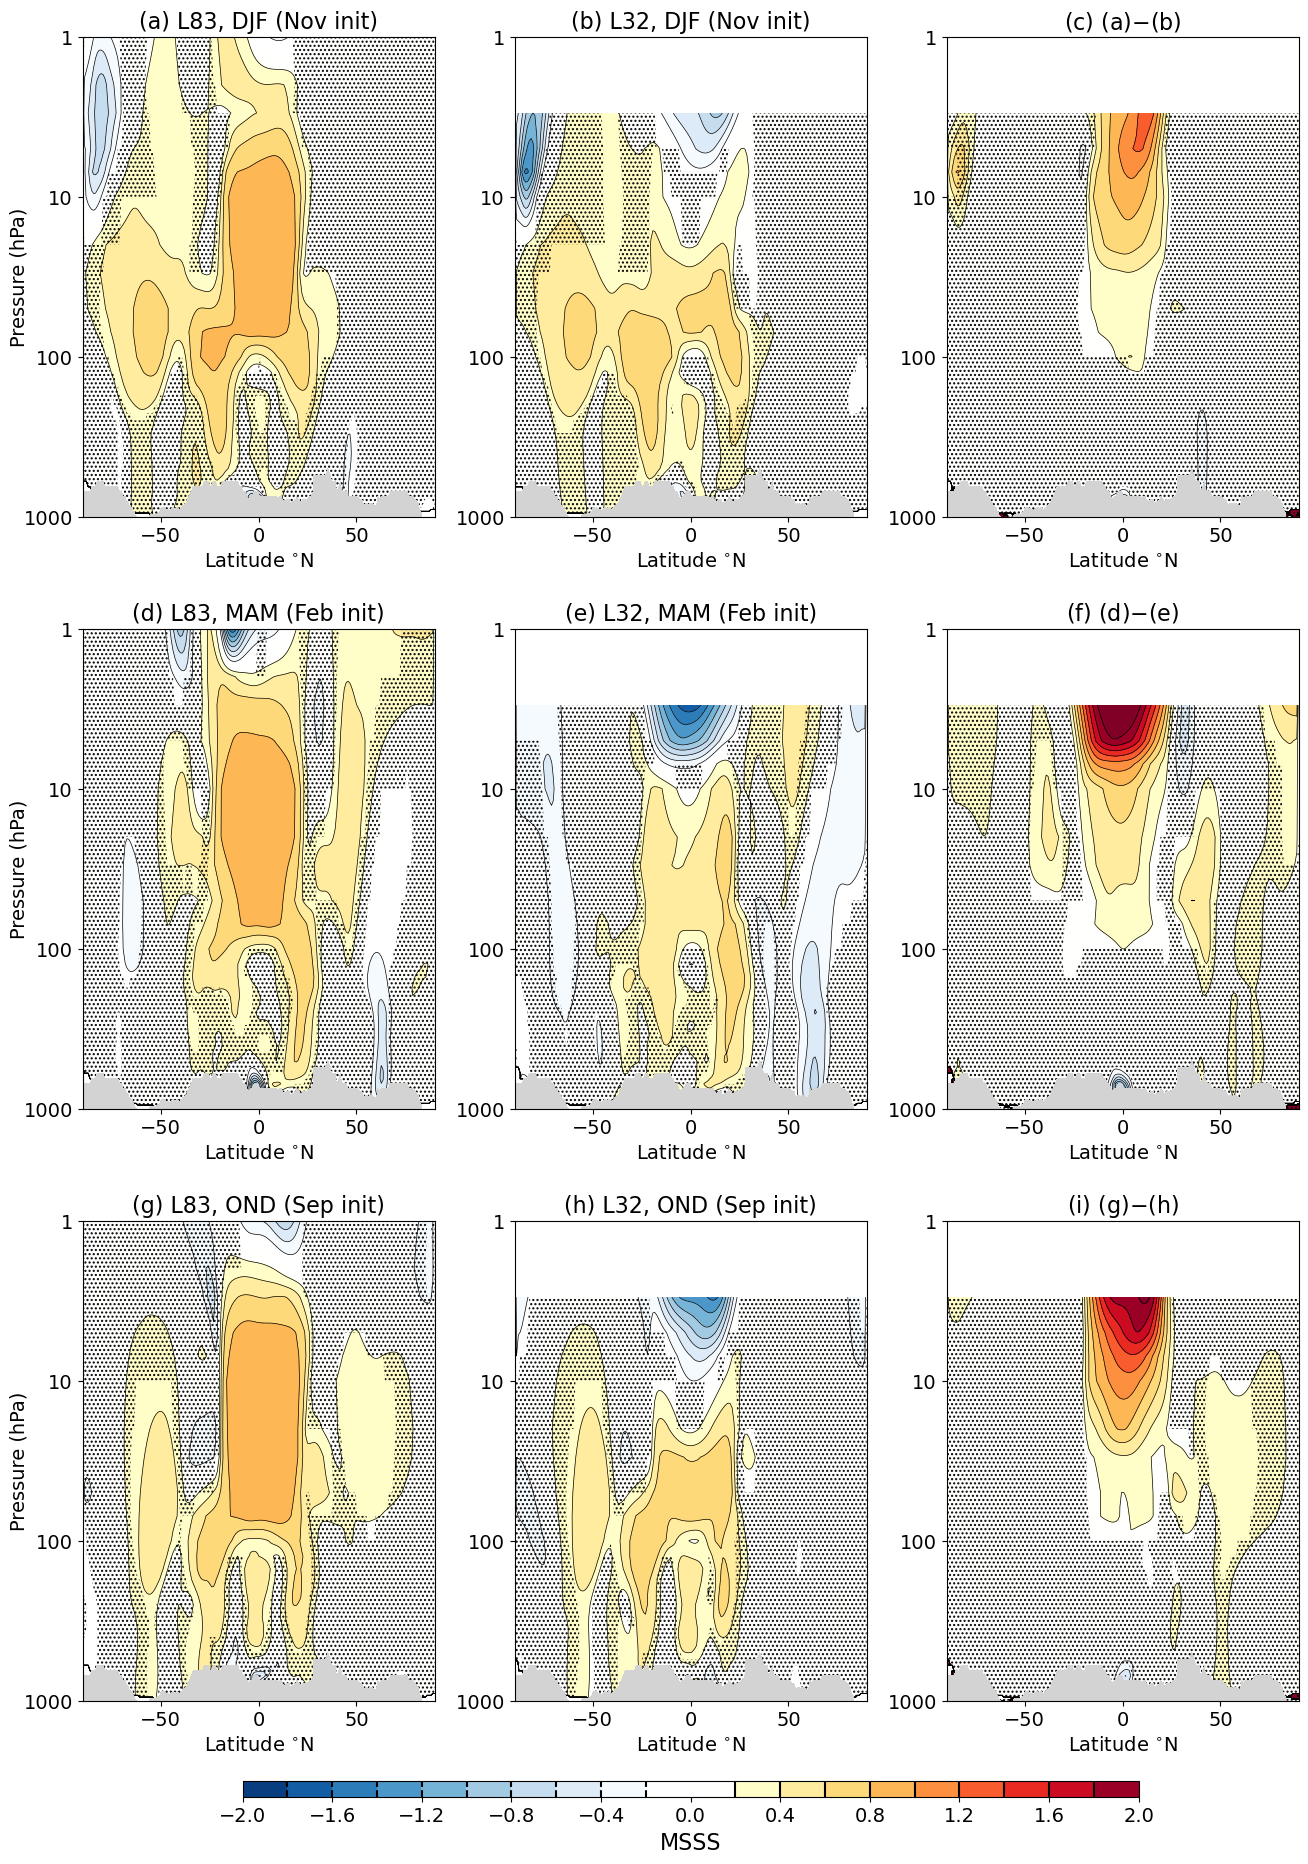

In [22]:
fig = plt.figure(figsize=(16,16))

mask = msss_high_nov*0 + nan 
mask = mask.where( msss_high_nov.level < ps, 1)

signifdat = xr.DataArray(np.ones([signif_latpre_nov.level.size,signif_latpre_nov.lat.size]), 
                         coords=[signif_latpre_nov.level, signif_latpre_nov.lat], dims=['level','lat'])

ci=0.2 ; cmax=2

#-----Nov initialization
signifplot = signifdat.where( ~((signif_latpre_nov.min95_high_msss > 0) | (signif_latpre_nov.max95_high_msss < 0)), nan)
ax = zmplot.plotlatlogpre_to1(fig, msss_high_nov, msss_high_nov.lat, msss_high_nov.level,ci,-1*cmax,cmax,'(a) L83, DJF (Nov init)',
                              0.05,0.27,0.7,1, signifdat = signifplot, stipplesignif=True, fsize=14)
ax.contourf(mask.lat, -1.*np.log10(mask.level), mask, levels=[0,0.5,1], colors='lightgray', zorder=1000)



signifplot = signifdat.where( ~((signif_latpre_nov.min95_low_msss > 0) | (signif_latpre_nov.max95_low_msss < 0)), nan)
signifplot = signifplot.where( ~np.isnan(msss_low_nov), nan)
ax = zmplot.plotlatlogpre_to1(fig, msss_low_nov, msss_low_nov.lat, msss_low_nov.level,ci,-1*cmax,cmax,'(b) L32, DJF (Nov init)',
                              0.32,0.54,0.7,1, ylabel=False, signifdat = signifplot, fsize=14, stipplesignif=True)
ax.contourf(mask.lat, -1.*np.log10(mask.level), mask, levels=[0,0.5,1], colors='lightgray', zorder=1000)

signifplot = signifdat.where( ~((signif_latpre_nov.min95_dif_msss > 0) | (signif_latpre_nov.max95_dif_msss < 0)), nan)
signifplot = signifplot.where( ~np.isnan(msss_low_nov), nan)
ax = zmplot.plotlatlogpre_to1(fig, msss_high_nov - msss_low_nov, msss_low_nov.lat, msss_low_nov.level,ci,-1*cmax,cmax,'(c) (a)$-$(b)',
                              0.59,0.81,0.7,1,ylabel=False, signifdat=signifplot, fsize=14, stipplesignif=True)
ax.contourf(mask.lat, -1.*np.log10(mask.level), mask, levels=[0,0.5,1], colors='lightgray', zorder=1000)

#------Feb initialization
signifplot = signifdat.where( ~((signif_latpre_feb.min95_high_msss > 0) | (signif_latpre_feb.max95_high_msss < 0)), nan)
ax = zmplot.plotlatlogpre_to1(fig, msss_high_feb, msss_high_feb.lat, msss_high_feb.level,ci,-1*cmax,cmax,'(d) L83, MAM (Feb init)',
                              0.05,0.27,0.33,0.63, signifdat = signifplot, fsize=14, stipplesignif=True)
ax.contourf(mask.lat, -1.*np.log10(mask.level), mask, levels=[0,0.5,1], colors='lightgray', zorder=1000)

signifplot = signifdat.where( ~((signif_latpre_feb.min95_low_msss > 0) | (signif_latpre_feb.max95_low_msss < 0)), nan)
signifplot = signifplot.where( ~np.isnan(msss_low_feb), nan)
ax = zmplot.plotlatlogpre_to1(fig, msss_low_feb, msss_low_feb.lat, msss_low_feb.level,ci,-1*cmax,cmax,'(e) L32, MAM (Feb init)',
                              0.32,0.54,0.33,0.63, ylabel=False, signifdat = signifplot, fsize=14, stipplesignif=True)
ax.contourf(mask.lat, -1.*np.log10(mask.level), mask, levels=[0,0.5,1], colors='lightgray', zorder=1000)

signifplot = signifdat.where( ~((signif_latpre_feb.min95_dif_msss > 0) | (signif_latpre_feb.max95_dif_msss < 0)), nan)
signifplot = signifplot.where( ~np.isnan(msss_low_feb), nan)
ax = zmplot.plotlatlogpre_to1(fig, msss_high_feb - msss_low_feb, msss_low_feb.lat, msss_low_feb.level,ci,-1*cmax,cmax,'(f) (d)$-$(e)',
                              0.59,0.81,0.33,0.63,ylabel=False, signifdat = signifplot, fsize=14, stipplesignif=True)
ax.contourf(mask.lat, -1.*np.log10(mask.level), mask, levels=[0,0.5,1], colors='lightgray', zorder=1000)

#------Sep initialization
signifplot = signifdat.where( ~((signif_latpre_sep.min95_high_msss > 0) | (signif_latpre_sep.max95_high_msss < 0)), nan)
ax = zmplot.plotlatlogpre_to1(fig, msss_high_sep, msss_high_sep.lat, msss_high_sep.level,ci,-1*cmax,cmax,'(g) L83, OND (Sep init)',
                              0.05,0.27,-0.04,0.26, signifdat = signifplot, fsize=14, stipplesignif=True)
ax.contourf(mask.lat, -1.*np.log10(mask.level), mask, levels=[0,0.5,1], colors='lightgray', zorder=1000)

signifplot = signifdat.where( ~((signif_latpre_sep.min95_low_msss > 0) | (signif_latpre_sep.max95_low_msss < 0)), nan)
signifplot = signifplot.where( ~np.isnan(msss_low_sep), nan)
ax = zmplot.plotlatlogpre_to1(fig, msss_low_sep, msss_low_sep.lat, msss_low_sep.level,ci,-1*cmax,cmax,'(h) L32, OND (Sep init)',
                              0.32,0.54,-0.04,0.26, ylabel=False, signifdat = signifplot, fsize=14, stipplesignif=True)
ax.contourf(mask.lat, -1.*np.log10(mask.level), mask, levels=[0,0.5,1], colors='lightgray', zorder=1000)

signifplot = signifdat.where( ~((signif_latpre_sep.min95_dif_msss > 0) | (signif_latpre_sep.max95_dif_msss < 0)), nan)
signifplot = signifplot.where( ~np.isnan(msss_low_sep), nan)
ax = zmplot.plotlatlogpre_to1(fig, msss_high_sep - msss_low_sep, msss_low_sep.lat, msss_low_sep.level,ci,-1*cmax,cmax,'(i) (g)$-$(h)',
                              0.59,0.81,-0.04,0.26,ylabel=False, signifdat=signifplot, fsize=14, stipplesignif=True)
ax.contourf(mask.lat, -1.*np.log10(mask.level), mask, levels=[0,0.5,1], colors='lightgray', zorder=1000)

ax = cbars.plotcolorbar(fig, ci, -1*cmax, cmax, 'MSSS', 0.05+0.1,0.81-0.1,-0.1,-0.09,
                        ticks=[-2,-1.6,-1.2,-0.8,-0.4,0,0.4,0.8,1.2,1.6,2], contourlines=True)

fig.savefig(plotpath+'fig4.png', bbox_inches='tight', facecolor='white')


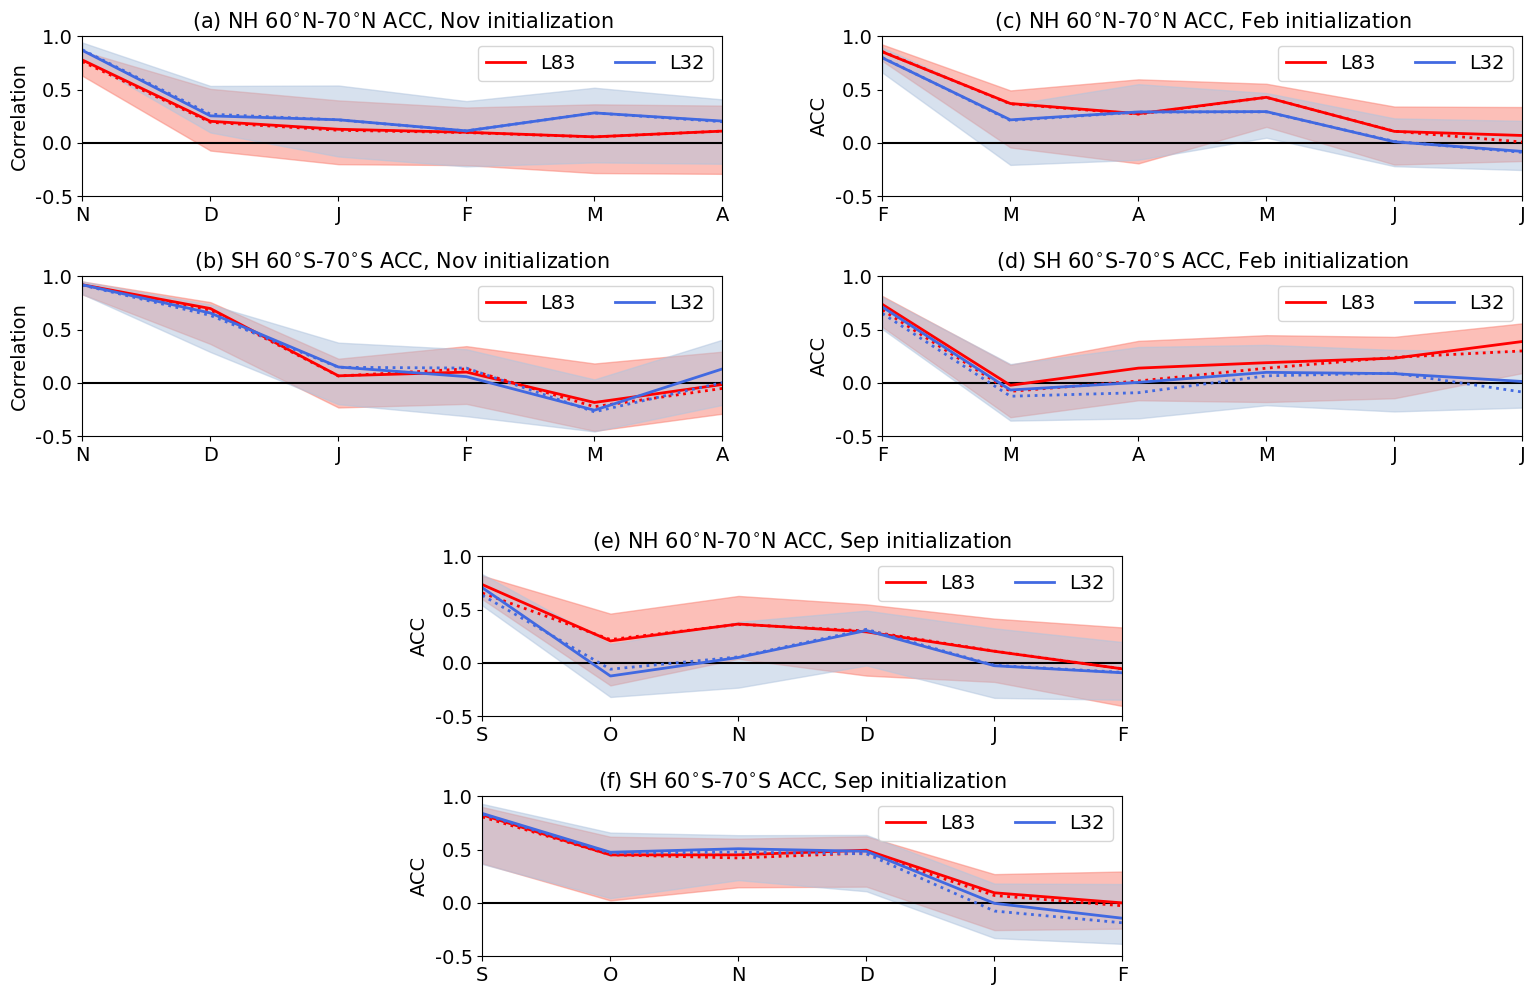

In [23]:
fig = plt.figure(figsize=(16,20))

ax = fig.add_axes([0.05,0.92,0.4,0.08])
ax.set_title('(a) NH 60$^{\circ}$N-70$^{\circ}$N ACC, Nov initialization', fontsize=15)
ax.plot([0,6],[0,0], color='black')
ax.set_xlim(0,5)
ax.set_xticks(np.arange(0,signif_nov.month.size,1))
ax.set_xticklabels(['N','D','J','F','M','A'], fontsize=14)
ax.set_ylim(-0.5,1)
ax.set_yticks([-0.5,0,0.5,1])
ax.set_yticklabels(['-0.5','0.0','0.5','1.0'], fontsize=14)
ax.set_ylabel('Correlation', fontsize=14)


ax.fill_between(np.arange(0,signif_nov.month.size,1), signif_nov.min95_high_nh_cor, signif_nov.max95_high_nh_cor, color='salmon', alpha=0.5)
ax.plot(np.arange(0,signif_nov.month.size,1), cor_high_nov_mon_em_nh, color='red', label='L83', linewidth=2)
ax.plot(np.arange(0,signif_nov.month.size,1), cor_high_nov_mon_em_nh_jra, color='red', linestyle='dotted', linewidth=2)
ax.fill_between(np.arange(0,signif_nov.month.size,1), signif_nov.min95_low_nh_cor, signif_nov.max95_low_nh_cor, color='lightsteelblue', alpha=0.5)
ax.plot(np.arange(0,signif_nov.month.size,1), cor_low_nov_mon_em_nh, color='royalblue', label='L32', linewidth=2)
ax.plot(np.arange(0,signif_nov.month.size,1), cor_low_nov_mon_em_nh_jra, color='royalblue', linestyle='dotted', linewidth=2)
ax.legend(ncol=2)


ax = fig.add_axes([0.05,0.8,0.4,0.08])
ax.set_title('(b) SH 60$^{\circ}$S-70$^{\circ}$S ACC, Nov initialization', fontsize=15)
ax.plot([0,6],[0,0], color='black')
ax.set_xlim(0,5)
ax.set_xticks(np.arange(0,signif_nov.month.size,1))
ax.set_xticklabels(['N','D','J','F','M','A'], fontsize=14)
ax.set_ylim(-0.5,1)
ax.set_yticks([-0.5,0,0.5,1])
ax.set_yticklabels(['-0.5','0.0','0.5','1.0'], fontsize=14)
ax.set_ylabel('Correlation', fontsize=14)

ax.fill_between(np.arange(0,signif_nov.month.size,1), signif_nov.min95_high_sh_cor, signif_nov.max95_high_sh_cor, color='salmon', alpha=0.5)
ax.plot(np.arange(0,signif_nov.month.size,1), cor_high_nov_mon_em_sh, color='red', label='L83', linewidth=2)
ax.plot(np.arange(0,signif_nov.month.size,1), cor_high_nov_mon_em_sh_jra, color='red', linestyle='dotted', linewidth=2)
ax.fill_between(np.arange(0,signif_nov.month.size,1), signif_nov.min95_low_sh_cor, signif_nov.max95_low_sh_cor, color='lightsteelblue', alpha=0.5)
ax.plot(np.arange(0,signif_nov.month.size,1), cor_low_nov_mon_em_sh, color='royalblue', label='L32', linewidth=2)
ax.plot(np.arange(0,signif_nov.month.size,1), cor_low_nov_mon_em_sh_jra, color='royalblue', linestyle='dotted', linewidth=2)
ax.legend(ncol=2)





ax = fig.add_axes([0.55,0.92,0.4,0.08])
ax.set_title('(c) NH 60$^{\circ}$N-70$^{\circ}$N ACC, Feb initialization', fontsize=15)
ax.plot([0,6],[0,0], color='black')
ax.set_xlim(0,5)
ax.set_xticks(np.arange(0,signif_feb.month.size,1))
ax.set_xticklabels(['F','M','A','M','J','J'], fontsize=14)
ax.set_ylim(-0.5,1)
ax.set_yticks([-0.5,0,0.5,1])
ax.set_yticklabels(['-0.5','0.0','0.5','1.0'], fontsize=14)
ax.set_ylabel('ACC', fontsize=14)


ax.fill_between(np.arange(0,signif_feb.month.size,1), signif_feb.min95_high_nh_cor, signif_feb.max95_high_nh_cor, color='salmon', alpha=0.5)
ax.plot(np.arange(0,signif_feb.month.size,1), cor_high_feb_mon_em_nh, color='red', label='L83', linewidth=2)
ax.plot(np.arange(0,signif_feb.month.size,1), cor_high_feb_mon_em_nh_jra, color='red', linestyle='dotted', linewidth=2)
ax.fill_between(np.arange(0,signif_feb.month.size,1), signif_feb.min95_low_nh_cor, signif_feb.max95_low_nh_cor, color='lightsteelblue', alpha=0.5)
ax.plot(np.arange(0,signif_feb.month.size,1), cor_low_feb_mon_em_nh, color='royalblue', label='L32', linewidth=2)
ax.plot(np.arange(0,signif_feb.month.size,1), cor_low_feb_mon_em_nh_jra, color='royalblue', linestyle='dotted', linewidth=2)
ax.legend(ncol=2)

ax = fig.add_axes([0.55,0.8,0.4,0.08])
ax.set_title('(d) SH 60$^{\circ}$S-70$^{\circ}$S ACC, Feb initialization', fontsize=15)
ax.plot([0,6],[0,0], color='black')
ax.set_xlim(0,5)
ax.set_xticks(np.arange(0,signif_feb.month.size,1))
ax.set_xticklabels(['F','M','A','M','J','J'], fontsize=14)
ax.set_ylim(-0.5,1)
ax.set_yticks([-0.5,0,0.5,1])
ax.set_yticklabels(['-0.5','0.0','0.5','1.0'], fontsize=14)
ax.set_ylabel('ACC', fontsize=14)

ax.fill_between(np.arange(0,signif_feb.month.size,1), signif_feb.min95_high_sh_cor, signif_feb.max95_high_sh_cor, color='salmon', alpha=0.5)
ax.plot(np.arange(0,signif_feb.month.size,1), cor_high_feb_mon_em_sh, color='red', label='L83', linewidth=2)
ax.plot(np.arange(0,signif_feb.month.size,1), cor_high_feb_mon_em_sh_jra, color='red', linestyle='dotted', linewidth=2)
ax.fill_between(np.arange(0,signif_feb.month.size,1), signif_feb.min95_low_sh_cor, signif_feb.max95_low_sh_cor, color='lightsteelblue', alpha=0.5)
ax.plot(np.arange(0,signif_feb.month.size,1), cor_low_feb_mon_em_sh, color='royalblue', label='L32', linewidth=2)
ax.plot(np.arange(0,signif_feb.month.size,1), cor_low_feb_mon_em_sh_jra, color='royalblue', linestyle='dotted', linewidth=2)
ax.legend(ncol=2)




ax = fig.add_axes([0.3,0.66,0.4,0.08])
ax.set_title('(e) NH 60$^{\circ}$N-70$^{\circ}$N ACC, Sep initialization', fontsize=15)
ax.plot([0,6],[0,0], color='black')
ax.set_xlim(0,5)
ax.set_xticks(np.arange(0,signif_sep.month.size,1))
ax.set_xticklabels(['S','O','N','D','J','F'], fontsize=14)
ax.set_ylim(-0.5,1)
ax.set_yticks([-0.5,0,0.5,1])
ax.set_yticklabels(['-0.5','0.0','0.5','1.0'], fontsize=14)
ax.set_ylabel('ACC', fontsize=14)


ax.fill_between(np.arange(0,signif_sep.month.size,1), signif_sep.min95_high_nh_cor, signif_sep.max95_high_nh_cor, color='salmon', alpha=0.5)
ax.plot(np.arange(0,signif_sep.month.size,1), cor_high_sep_mon_em_nh, color='red', label='L83', linewidth=2)
ax.plot(np.arange(0,signif_sep.month.size,1), cor_high_sep_mon_em_nh_jra, color='red', linestyle='dotted', linewidth=2)
ax.fill_between(np.arange(0,signif_sep.month.size,1), signif_sep.min95_low_nh_cor, signif_sep.max95_low_nh_cor, color='lightsteelblue', alpha=0.5)
ax.plot(np.arange(0,signif_sep.month.size,1), cor_low_sep_mon_em_nh, color='royalblue', label='L32', linewidth=2)
ax.plot(np.arange(0,signif_sep.month.size,1), cor_low_sep_mon_em_nh_jra, color='royalblue', linestyle='dotted', linewidth=2)
ax.legend(ncol=2)

ax = fig.add_axes([0.3,0.54,0.4,0.08])
ax.set_title('(f) SH 60$^{\circ}$S-70$^{\circ}$S ACC, Sep initialization', fontsize=15)
ax.plot([0,6],[0,0], color='black')
ax.set_xlim(0,5)
ax.set_xticks(np.arange(0,signif_sep.month.size,1))
ax.set_xticklabels(['S','O','N','D','J','F'], fontsize=14)
ax.set_ylim(-0.5,1)
ax.set_yticks([-0.5,0,0.5,1])
ax.set_yticklabels(['-0.5','0.0','0.5','1.0'], fontsize=14)
ax.set_ylabel('ACC', fontsize=14)

ax.fill_between(np.arange(0,signif_sep.month.size,1), signif_sep.min95_high_sh_cor, signif_sep.max95_high_sh_cor, color='salmon', alpha=0.5)
ax.plot(np.arange(0,signif_sep.month.size,1), cor_high_sep_mon_em_sh, color='red', label='L83', linewidth=2)
ax.plot(np.arange(0,signif_sep.month.size,1), cor_high_sep_mon_em_sh_jra, color='red', linestyle='dotted', linewidth=2)
ax.fill_between(np.arange(0,signif_sep.month.size,1), signif_sep.min95_low_sh_cor, signif_sep.max95_low_sh_cor, color='lightsteelblue', alpha=0.5)
ax.plot(np.arange(0,signif_sep.month.size,1), cor_low_sep_mon_em_sh, color='royalblue', label='L32', linewidth=2)
ax.plot(np.arange(0,signif_sep.month.size,1), cor_low_sep_mon_em_sh_jra, color='royalblue', linestyle='dotted', linewidth=2)
ax.legend(ncol=2)

fig.savefig(plotpath+'fig5.png', bbox_inches='tight', facecolor='white')